# Avaliação e validação de experimentos


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Semente aleatória para reproducibilidade dos experimentos (reproducão dos experimentos)

SEED = 17

In [ ]:
df_raw = pd.read_excel('data/satisfaction_2015.xlsx')

print(df_raw.shape)

(129880, 24)


In [ ]:
df_raw.head(9).T

,0,1,2,3,4,5,6,7,8
id,117135,72091,29663,81849,83693,129488,69507,126309,123581
satisfaction_v2,satisfied,satisfied,satisfied,satisfied,satisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied
Gender,Male,Male,Male,Female,Male,Female,Male,Female,Female
Customer Type,disloyal Customer,disloyal Customer,disloyal Customer,disloyal Customer,disloyal Customer,disloyal Customer,disloyal Customer,disloyal Customer,disloyal Customer
Age,56,49,55,36,55,15,51,26,37
Type of Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel
Class,Eco,Eco,Eco,Eco,Eco,Eco,Eco,Eco,Eco
Flight Distance,369,2486,1448,1501,577,2704,1746,650,1773
Inflight wifi service,0,0,0,0,0,1,1,1,1
Departure/Arrival time convenient,2,2,3,4,5,0,0,1,1


In [ ]:
df_raw.info()
df_raw.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.00,4.0,5.00,5.0


In [ ]:
from sklearn.model_selection import train_test_split


df, _ = train_test_split(df_raw, train_size=1000, stratify=df_raw["satisfaction_v2"], random_state=SEED)



In [ ]:
df = df.drop(columns=["id", "Gate location"])

df["satisfaction_v2"] = df["satisfaction_v2"].replace({"satisfied": 1, "neutral or dissatisfied": 0})
df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})
df["Customer Type"] = df["Customer Type"].replace({"Loyal Customer": True, "disloyal Customer": False})
df["Type of Travel"] = df["Type of Travel"].replace({"Business travel": True, "Personal Travel": False})
df["Class"] = df["Class"].replace({"Eco": 0, "Eco Plus": 1, "Business": 3})

/var/folders/c6/vss0yj1j115_3ykhy6lb4kcw0000gn/T/ipykernel_12035/2314796760.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["satisfaction_v2"] = df["satisfaction_v2"].replace({"satisfied": 1, "neutral or dissatisfied": 0})
/var/folders/c6/vss0yj1j115_3ykhy6lb4kcw0000gn/T/ipykernel_12035/2314796760.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})
/var/folders/c6/vss0yj1j115_3ykhy6lb4kcw0000gn/T/ipykernel_12035/2314796760.py:5: FutureWarning: Downcasting behavio

In [ ]:
df["Class"].value_counts()

Class
3    471
0    460
1     69
Name: count, dtype: int64

In [ ]:
# To simplify the code, we will only use numeric features

X = df.drop(columns="satisfaction_v2")

yreg = df.satisfaction_v2
ycla = yreg > 0

print(X.shape)

(1000, 21)


## Classificação

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

In [ ]:
scorer = make_scorer(accuracy_score) # Teste outras

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=SEED)
gscv = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)

algorithms = {
    'kNN':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]),
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring=scorer,
        cv=gscv),


    'tree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=SEED))]),
        param_grid={
            'tree__max_depth': [5, 10, 20],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),


    'bigtree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=SEED))]),
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),


    'nb': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('selector', SelectKBest()),
            ('nb', GaussianNB())]),
        param_grid={
            'selector__k': [3, 5, 10],
        },
        scoring=scorer,
        cv=gscv),


    'svmlinear': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=SEED))]),
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),

        
    'svmrbf': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(random_state=SEED)),
            ('svm', SVC(kernel='rbf', random_state=SEED))]),
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
}

In [ ]:
from sklearn.model_selection import cross_val_score

result = {}
for alg, clf in algorithms.items():
  result[alg] = cross_val_score(clf, X, ycla, cv=cv)

result = pd.DataFrame.from_dict(result)

In [ ]:
print(result)

         kNN      tree   bigtree        nb  svmlinear    svmrbf
0   0.880597  0.865672  0.895522  0.880597   0.791045  0.880597
1   0.895522  0.895522  0.880597  0.865672   0.850746  0.925373
2   0.850746  0.865672  0.865672  0.776119   0.761194  0.805970
3   0.925373  0.925373  0.910448  0.820896   0.820896  0.880597
4   0.895522  0.985075  0.895522  0.865672   0.865672  0.940299
5   0.835821  0.880597  0.865672  0.805970   0.791045  0.791045
6   0.865672  0.895522  0.850746  0.805970   0.776119  0.850746
7   0.850746  0.850746  0.895522  0.820896   0.805970  0.880597
8   0.865672  0.880597  0.865672  0.805970   0.820896  0.805970
9   0.910448  0.880597  0.895522  0.865672   0.880597  0.955224
10  0.848485  0.939394  0.924242  0.878788   0.848485  0.848485
11  0.939394  0.909091  0.893939  0.848485   0.833333  0.909091
12  0.863636  0.848485  0.863636  0.803030   0.833333  0.848485
13  0.909091  0.924242  0.924242  0.833333   0.863636  0.893939
14  0.878788  0.909091  0.893939  0.8787

In [ ]:
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.88 ± 0.03
tree         0.90 ± 0.04
bigtree      0.89 ± 0.02
nb           0.84 ± 0.03
svmlinear    0.83 ± 0.03
svmrbf       0.87 ± 0.05
dtype: object

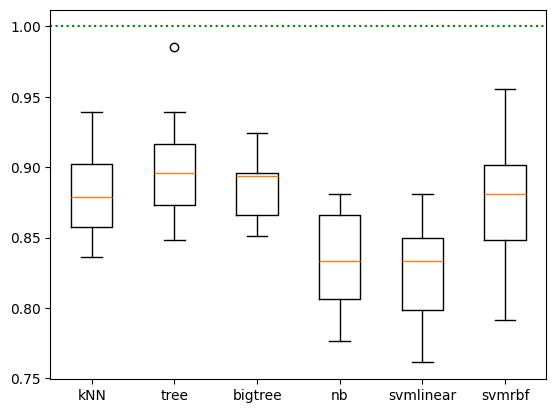

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([ scores for alg, scores in result.items()])
plt.xticks(1 + np.arange(result.shape[1]), result.columns)

plt.axhline(1, linestyle="dotted", color="green")
# plt.ylim(0,1.05)  # Nao mentir com dados para os coleguinhas

plt.show()